# Chiral spectra of carbon dots and PCA

## citric acid

Read about PCA https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/

Data from E.Ushakova and E.Stepanidenko, PhysNano, ITMO University.

In [11]:
import numpy as np
import pandas as pd

import glob

import seaborn as sns

from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler

In [22]:
path = './data/'
# https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/
#csv_files = glob.glob(path + "/*.csv")
df_temp = pd.concat(map(pd.read_csv, glob.glob(path + "*.csv")), axis=1)
#df_temp = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
#print(df_temp)

f_size = '8'

df = df_temp.T

if not  glob.glob(path + 'citric_acid' + '.dat'):
    df.to_csv(path + 'citric_acid' + '.dat')


#df = df.replace('--', np.nan)


wl = df.iloc[0,4:]
#wl = wl.astype('int')

wl = pd.to_numeric(wl, errors='coerce')
print(wl)
#wl = df.values[0, 4:]
#df['x'] = pd.to_numeric(df['x'], errors='coerce')
#wl = wl.astype('int')
#wl = np.arange(300,801)

df = df.drop('Wavelength')

acids = df[2].unique()
#acids = df.values[1:, 3]
#acids.unique() # AttributeError: 'numpy.ndarray' object has no attribute 'unique'
print('acids are', acids)

4      300
5      301
6      302
7      303
8      304
      ... 
500    796
501    797
502    798
503    799
504    800
Name: Wavelength, Length: 501, dtype: int64
acids are ['Phe' 'Cys' 'Try' 'Non' 'Glu' 'α-M' 'Ser']


In [23]:
spectra = df.values[:, 4:].astype('float')

#spectra = df.iloc[:, 4:]

#spectra = pd.to_numeric(spectra, errors='coerce')

# вариант сглаживания:
spectra_sm = savgol_filter(spectra, 25, polyorder = 5, deriv=0)

# labels of measurements and samples
labplot = []
for i in range(df.shape[0]):
    labplot.append(df.values[i, 2] + ' ' + df.values[i, 3])

# или свой цвет каждому образцу
colors = [plt.cm.jet(float(i)/len(labplot)) for i in range(len(labplot))]
symb = ['o','v','x','s','+','>','^','*']

# or one color for every group
# ['Cys' 'Glu' 'Phe' 'Try' 'Ser' 'α-M' 'Non']
groups = [None] * len(acids)


# свой цвет каждой аминокислоте
colors = [None] * len(labplot)
for count, acid in enumerate(acids):
    for k in range(df.shape[0]):
        if df.values[k,2] == acid:
            colors[k] = plt.cm.jet(float(count)/len(groups))
'''
groups[0] = [0,13]
groups[1] = [1,16]
groups[2] = [2,12]
groups[3] = [3,14]
groups[4] = [4,5,6,7,17,18,19,20,21]
groups[5] = [8,9,10,11]
groups[6] = [15,22,23,24,25]

colors = [None] * len(labplot)

for n, i in enumerate(groups):
    for j in i:
        colors[j] = plt.cm.jet(float(n)/len(groups))
print(colors)

'''

'\ngroups[0] = [0,13]\ngroups[1] = [1,16]\ngroups[2] = [2,12]\ngroups[3] = [3,14]\ngroups[4] = [4,5,6,7,17,18,19,20,21]\ngroups[5] = [8,9,10,11]\ngroups[6] = [15,22,23,24,25]\n\ncolors = [None] * len(labplot)\n\nfor n, i in enumerate(groups):\n    for j in i:\n        colors[j] = plt.cm.jet(float(n)/len(groups))\nprint(colors)\n\n'

Исходные спектры:

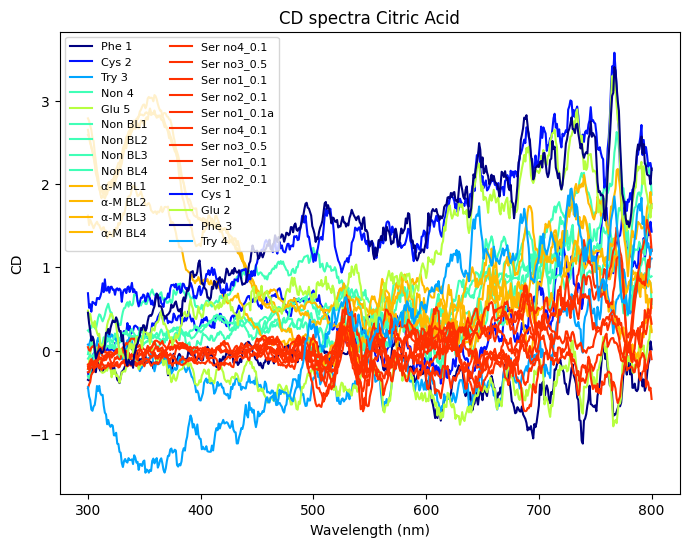

In [24]:
fig = plt.figure(figsize=(8,6)) #(8*cm,6*cm))
for i in range(len(labplot)):
    col = np.expand_dims(np.array(colors[i]), axis=0)
    plt.plot(wl, spectra[i,:].T, c=col, label=labplot[i])

plt.xlabel('Wavelength (nm)')
plt.ylabel('CD')
plt.legend(labplot,loc='upper left', ncol=2, fontsize=f_size)
plt.title('CD spectra Citric Acid')
plt.show()

Сглаженные спектры:

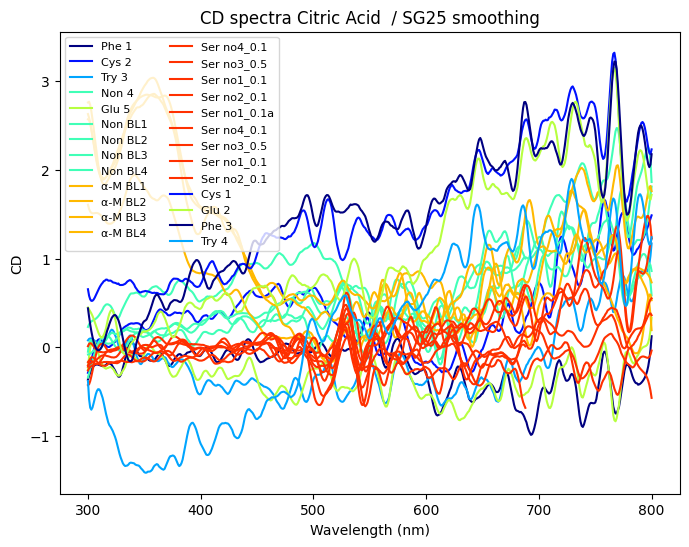

In [25]:
fig = plt.figure(figsize=(8,6)) #(8*cm,6*cm))
for i in range(len(labplot)):
    col = np.expand_dims(np.array(colors[i]), axis=0)
    plt.plot(wl, spectra_sm[i,:].T, c=col, label=labplot[i])
plt.xlabel('Wavelength (nm)')
plt.ylabel('CD')
plt.legend(labplot,loc='upper left', ncol=2, fontsize=f_size)
plt.title('CD spectra Citric Acid  / SG25 smoothing')
plt.show()

Усредненные спектры (хотя странно усреднять, когда видно что цистеин, глютамин и фенилаланин так сильно отличаются):

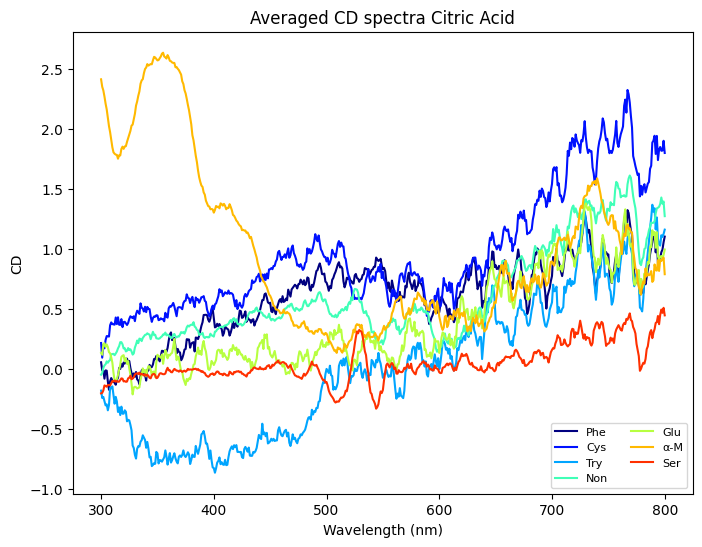

In [26]:
fig = plt.figure(figsize=(8,6)) #(8*cm,6*cm))

# Вычислим среднее по столбцам которые имеют одинаковые метки

colors_av = [plt.cm.jet(float(i)/len(acids)) for i in range(len(acids))]


for n, acid in enumerate(acids):
    col = np.expand_dims(np.array(colors_av[n]), axis=0)
    df2 = df.loc[df[2] == acid,4:].astype('float')
    plt.plot(wl, df2.mean(axis=0).T, c=col, label=acid)

'''
for n, i in enumerate(groups):
    col = np.expand_dims(np.array(colors[groups[n][0]]), axis=0)
    plt.plot(wl, spectra[groups[n],:].mean(0).T, c=col, label=acids[n])            
'''            
plt.xlabel('Wavelength (nm)')
plt.ylabel('CD')
plt.legend(ncol=2, fontsize=f_size) # loc='upper left', 
plt.title('Averaged CD spectra Citric Acid')

plt.show() 

### wpca.
WPCA uses a direct decomposition of a weighted covariance matrix to
compute principal vectors, and then a weighted least squares optimization
to compute principal components. It is based on the algorithm presented
in \"Weighted principal component analysis: a weighted covariance eigendecomposition approach\" [Delchambre (2014)](http://arxiv.org/abs/1412.4533)

    
### empca.
EMPCA uses an iterative expectation-maximization approach to solve
simultaneously for the principal vectors and principal components of
weighted data. It is based on the algorithm presented in \"Principal Component Analysis with Noisy and/or Missing Data\"
[Bailey (2012)](http://arxiv.org/abs/1208.4122).

## WPCA

WPCA uses a direct decomposition of a weighted covariance matrix to compute principal vectors, and then a weighted least squares optimization to compute principal components. It is based on the algorithm presented in Delchambre (2014)

In [27]:
'''
«Missing data is simply the limit of weight=0.»
То ли они сами «взвешиваются», то ли надо матрицу составлять, где НаН заменяется на 0, 
а не-НаН заменяется на 1. 
Как НаН искать понятно, а как не-НаН - хз. 
Или составить единичный датафрейм и поменять на 0 там элементы, соответствующие НаН? 
Или как-то логически умножить одну на другую, чтобы получить маску?
Точно, заменить НаН на нули и сделать логическое И с единичной матрицей.
'''
# Лучше тогда работать со спектром, конвертируя его в ДФ, а не делая новую выборку
spectra_weights = pd.DataFrame(spectra)
# weights = weights.replace(np.nan, 0)

# Mapping NaN values to 0 and non-NaN values to 1 in Pandas DataFrame
# https://www.skytowner.com/explore/mapping_nan_values_to_0_and_non_nan_values_to_1_in_pandas_dataframe
spectra_weights = spectra_weights.notnull().astype("int")

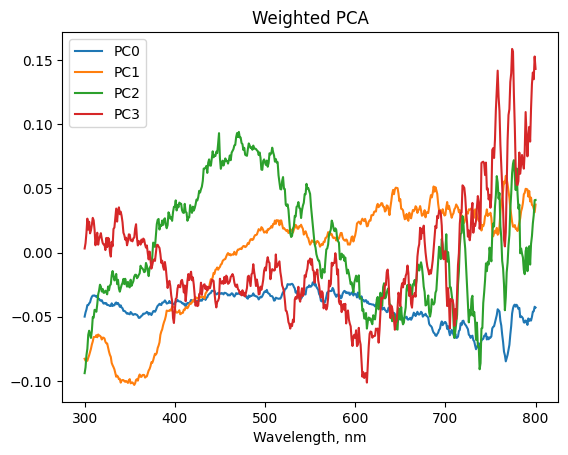

In [28]:
from wpca import WPCA

# https://notebook.community/jakevdp/wpca/WPCA-Example
# https://github.com/jakevdp/wpca/blob/master/WPCA-Example.ipynb




wpca = WPCA(n_components=5)
Xt = wpca.fit_transform(spectra, weights=spectra_weights)
Y = WPCA(n_components=3).fit_reconstruct(spectra, weights=spectra_weights) # , **kwds


for i in range(4):
    plt.plot(wl,  wpca.components_[i], label="PC" + str(i))

plt.xlabel('Wavelength, nm')
plt.legend() #(loc='upper right')
plt.title('Weighted PCA')
plt.show()


# print('Y: ', Y.shape) # Y:  (21, 201)
# print('Y: ', Y)
# print('wpca: ', wpca.shape) #  wpca: (21, 5)
# print('wpca: ', wpca) #

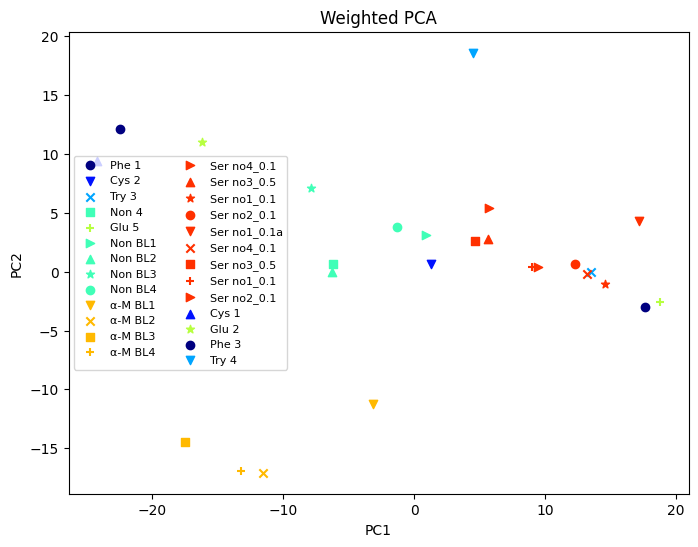

In [29]:
plt.figure(figsize=(8,6))
for j in range(len(Xt[:,0])):
    col = np.expand_dims(np.array(colors[j]), axis=0)
    xi = Xt[j,0]
    yi = Xt[j,1]
    plt.scatter(xi, yi, c=col, label=labplot[j], marker = symb[j % len(symb)])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(labplot, ncol=2, fontsize=f_size) # ,loc='lower left'
plt.title('Weighted PCA')
plt.show()


# можно попробовать добавить обводку групп, если взять метод перебора из востроения средних кривых:
'''
for n, acid in enumerate(acids):
    col = np.expand_dims(np.array(colors_av[n]), axis=0)
    df2 = df.loc[df[2] == acid,4:].astype('float')
    plt.plot(wl, df2.mean(axis=0).T, c=col, label=acid)
'''

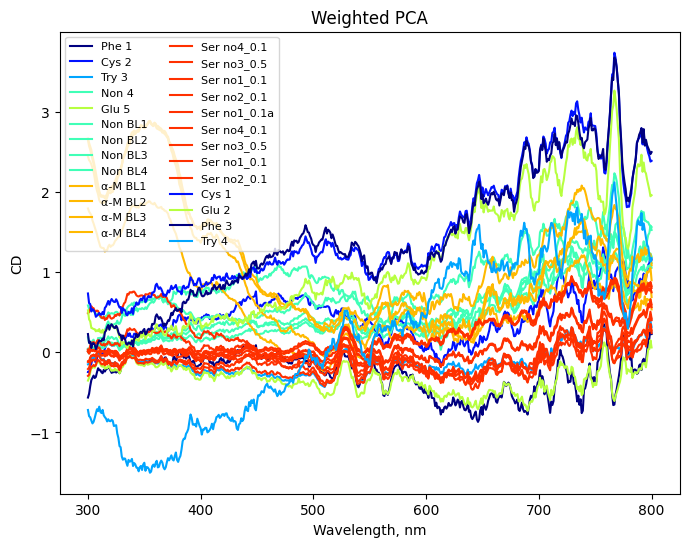

In [30]:
plt.figure(figsize=(8,6))
for j in range(len(Y[:,0])):
    col = np.expand_dims(np.array(colors[j]), axis=0)
    plt.plot(wl, Y[j].T, c=col, label=labplot[j])
plt.xlabel('Wavelength, nm')
plt.ylabel('CD')
plt.legend(labplot,loc='upper left', ncol=2, fontsize=f_size)
plt.title('Weighted PCA')
plt.show()

## EMPCA

EMPCA https://github.com/sbailey/empca/tree/master

EMPCA: Weighted Expectation Maximization Principal Component Analysis.

Classic PCA is great but it doesn't know how to handle noisy or missing data properly. This module provides Weighted Expectation Maximization PCA, an iterative method for solving PCA while properly weighting data. Missing data is simply the limit of weight=0.

In [31]:
# с "weights=spectra_weights, " дает ошибку "pandas.errors.InvalidIndexError: (0, 0)"
# без - дает пустые спектры РС и график РС1-РС2

import empca

m = empca.empca(spectra, silent=True, niter=20, weights=spectra_weights)

'''
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(wl,  m.eigvec[i], label="PC" + str(i))

plt.xlabel('Wavelength, nm')
plt.legend(loc='upper right')
plt.title('Weighted EMPCA')
plt.show()
'''

InvalidIndexError: (0, 0)

In [ ]:
plt.figure(figsize=(8,6))
for j in range(len(m.data[:,0])):
    col = np.expand_dims(np.array(colors[j]), axis=0)
    xi = m.coeff[j,0]
    yi = m.coeff[j,1]
    plt.scatter(xi, yi, c=col, label=labplot[j], marker = symb[j % len(symb)])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(labplot, fontsize=f_size, ncol=2)
plt.title('Weighted EMPCA')
plt.show()